In [1]:
#Installing required packages

#!pip install WordNet
#!pip install torch
#!pip install spacy
#!pip install -U spacy 
#pip install transformers
#!python -m spacy download en_core_web_sm

#importing required libraries

import pandas as pd
import numpy as np 
import nltk
import re
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns


#  Preprocesssing textual data

from nltk import word_tokenize, pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources

nltk.download('stopwords')
nltk.download('lemmatizer')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading lemmatizer: Package 'lemmatizer' not found
[nltk_data]     in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\U

In [2]:
# Importing required data AND Overview
data = pd.read_csv(r"C:\Users\sukan\ipba\csv\comments_for_video_8Ko3-WkSWwI.csv")
data.head(25)

,Comment Number,Reply Number,Like Count,Published At,Text
0,1.0,NaN,0,2023-02-12T05:23:24Z,Cancel them now
1,2.0,NaN,0,2023-02-12T05:05:54Z,Niggas knew wht they doin u making a ad to get people attention an u do tht common sense karmic retribution show it to us then forcefully do shit in front of us an we programmed to be helpless because oh the masses tht are unknown to this matrix or just war were in
2,3.0,NaN,0,2023-02-07T01:20:59Z,Balenciaga airs the commercial then wants to play victim and sue the people they hired for putting together the commercial they approved. That’s rich.
3,4.0,NaN,0,2023-02-05T09:15:01Z,Its all about publicity.. dont you get it???
4,5.0,NaN,0,2023-01-25T20:38:40Z,Why’s everyone quiet about this???
5,6.0,NaN,0,2023-01-22T03:41:31Z,"If it was broadcasted in India, believe me hardly anyone will know about this video, bcoz many do not know about it and teddybear looks normal for them they don't watch Ads that keenly!"
6,7.0,NaN,0,2023-01-22T03:37:27Z,Money and power can silent media!
7,8.0,NaN,0,2023-01-17T05:31:55Z,That is why islam is a last hope 💪
8,NaN,1.0,0,2023-01-19T13:53:13Z,r u muslim
9,9.0,NaN,0,2023-01-15T18:21:05Z,Crossing the line….lol… there is a crossing the line when it comes to people being pediphiles…. The term “panda” mean anything…. They jst got accustomed to being accept in there group that they though the world would support it to…. Everyone that wears that brand are sick people.. I know if I EVER see someone wear that brand I’m going to make sure that I’m extra nice to the indivial/group…


In [3]:
data.shape

(1780, 5)

In [4]:
# Changing name of 'text' column to 'Comments' column
data.rename(columns = {'Text':'Comments'}, inplace = True)
# removing columns

data = data.drop(['Like Count','Reply Number','Comment Number','Published At'], axis=1)
#data = data[['Comments']][:2000]

In [5]:
data['Comments'] =data['Comments'].astype(str)

In [6]:
data.head()

,Comments
0,Cancel them now
1,Niggas knew wht they doin u making a ad to get people attention an u do tht common sense karmic retribution show it to us then forcefully do shit in front of us an we programmed to be helpless because oh the masses tht are unknown to this matrix or just war were in
2,Balenciaga airs the commercial then wants to play victim and sue the people they hired for putting together the commercial they approved. That’s rich.
3,Its all about publicity.. dont you get it???
4,Why’s everyone quiet about this???


In [7]:
data.dtypes

Comments    object
dtype: object

In [8]:
data.shape

(1780, 1)

In [9]:
#### EDA- cleaning

In [10]:
# URLs removal and extra spaces too

data['Comments'] = data['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())

In [11]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [12]:
# Commit to Table
data['Comments'] = data['Comments'].apply(remove_punctuations)

In [13]:
# Convert to lower 
data['Comments']=data['Comments'].apply(lambda x: x.lower())

In [14]:
# Get Stopwords
stop = stopwords.words('english')

In [15]:
# Tokenize and Remove Stop Words
data['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [cancel]
1                                                                                                                                                                                                                                                                   [niggas, knew, wht, doin, u, making, ad, get, people, attention, u, tht, common, sense, karmic, retribution, show, us, forcefully, shit, front, us, programmed, helpless, oh, masses, tht, unknown, matrix, war]
2                                                             

In [16]:
# Join the words back
data['Comments'] = data['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [18]:
# Commit to Table

data['Comments'] = data['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [19]:
# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
data['Tokens'] = data['Comments'].apply(tokenize_tweet)

In [20]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [21]:
# Applying the POS tagging function to the 'Comments' column
data['POS_Tagged'] = data['Comments'].apply(pos_tagging)

In [22]:
data.head()

,Comments,Tokens,POS_Tagged
0,cancel,[cancel],"[(cancel, NN)]"
1,niggas knew wht doin u making ad get people attention u tht common sense karmic retribution show us forcefully shit front us programmed helpless oh masses tht unknown matrix war,"[niggas, knew, wht, doin, u, making, ad, get, people, attention, u, tht, common, sense, karmic, retribution, show, us, forcefully, shit, front, us, programmed, helpless, oh, masses, tht, unknown, matrix, war]","[(niggas, RB), (knew, VBD), (wht, JJ), (doin, NN), (u, JJ), (making, VBG), (ad, NN), (get, NN), (people, NNS), (attention, NN), (u, JJ), (tht, JJ), (common, JJ), (sense, NN), (karmic, JJ), (retribution, NN), (show, VBP), (us, PRP), (forcefully, RB), (shit, VBD), (front, JJ), (us, PRP), (programmed, VBD), (helpless, JJ), (oh, JJ), (masses, NNS), (tht, VBP), (unknown, JJ), (matrix, NNS), (war, NN)]"
2,balenciaga airs commercial wants play victim sue people hired putting together commercial approved that’s rich,"[balenciaga, airs, commercial, wants, play, victim, sue, people, hired, putting, together, commercial, approved, that, ’, s, rich]","[(balenciaga, NN), (airs, VBZ), (commercial, JJ), (wants, VBZ), (play, VB), (victim, JJ), (sue, NN), (people, NNS), (hired, VBD), (putting, VBG), (together, RB), (commercial, JJ), (approved, VBD), (that, IN), (’, NNP), (s, VBD), (rich, JJ)]"
3,publicity dont get,"[publicity, dont, get]","[(publicity, NN), (dont, NN), (get, NN)]"
4,why’s everyone quiet,"[why, ’, s, everyone, quiet]","[(why, WRB), (’, JJ), (s, NN), (everyone, NN), (quiet, JJ)]"


In [23]:
####Creating models and using it on the dataset

In [24]:
###Analysing sentiments through vader

In [25]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = data['Comments'].apply(sid.polarity_scores)

In [26]:
data["vader_score"] = sentiment_scores.apply(lambda x: x['compound'])

In [27]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score
0,cancel,[cancel],"[(cancel, NN)]",-0.2500
1,niggas knew wht doin u making ad get people attention u tht common sense karmic retribution show us forcefully shit front us programmed helpless oh masses tht unknown matrix war,"[niggas, knew, wht, doin, u, making, ad, get, people, attention, u, tht, common, sense, karmic, retribution, show, us, forcefully, shit, front, us, programmed, helpless, oh, masses, tht, unknown, matrix, war]","[(niggas, RB), (knew, VBD), (wht, JJ), (doin, NN), (u, JJ), (making, VBG), (ad, NN), (get, NN), (people, NNS), (attention, NN), (u, JJ), (tht, JJ), (common, JJ), (sense, NN), (karmic, JJ), (retribution, NN), (show, VBP), (us, PRP), (forcefully, RB), (shit, VBD), (front, JJ), (us, PRP), (programmed, VBD), (helpless, JJ), (oh, JJ), (masses, NNS), (tht, VBP), (unknown, JJ), (matrix, NNS), (war, NN)]",-0.9169
2,balenciaga airs commercial wants play victim sue people hired putting together commercial approved that’s rich,"[balenciaga, airs, commercial, wants, play, victim, sue, people, hired, putting, together, commercial, approved, that, ’, s, rich]","[(balenciaga, NN), (airs, VBZ), (commercial, JJ), (wants, VBZ), (play, VB), (victim, JJ), (sue, NN), (people, NNS), (hired, VBD), (putting, VBG), (together, RB), (commercial, JJ), (approved, VBD), (that, IN), (’, NNP), (s, VBD), (rich, JJ)]",0.7717
3,publicity dont get,"[publicity, dont, get]","[(publicity, NN), (dont, NN), (get, NN)]",0.0000
4,why’s everyone quiet,"[why, ’, s, everyone, quiet]","[(why, WRB), (’, JJ), (s, NN), (everyone, NN), (quiet, JJ)]",0.0000


In [28]:
count_total=0
count_pos=0
count_neg=0
#count_neut=0


for i in data["vader_score"]:
    if i >=0:
        count_pos=count_pos+1
    elif i <0:
        count_neg = count_neg +1
    else:
        0
        #count_neut = count_neut +1
        
 

print("positive tweets:",count_pos)
print("negative tweets:",count_neg)

conditions = [
    (data['vader_score'] >=0),
    (data['vader_score'] <0)]
    
choices = [1,0]
data['vader_sentiment'] = np.select(conditions, choices )

positive tweets: 887
negative tweets: 893


In [29]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment
0,cancel,[cancel],"[(cancel, NN)]",-0.2500,0
1,niggas knew wht doin u making ad get people attention u tht common sense karmic retribution show us forcefully shit front us programmed helpless oh masses tht unknown matrix war,"[niggas, knew, wht, doin, u, making, ad, get, people, attention, u, tht, common, sense, karmic, retribution, show, us, forcefully, shit, front, us, programmed, helpless, oh, masses, tht, unknown, matrix, war]","[(niggas, RB), (knew, VBD), (wht, JJ), (doin, NN), (u, JJ), (making, VBG), (ad, NN), (get, NN), (people, NNS), (attention, NN), (u, JJ), (tht, JJ), (common, JJ), (sense, NN), (karmic, JJ), (retribution, NN), (show, VBP), (us, PRP), (forcefully, RB), (shit, VBD), (front, JJ), (us, PRP), (programmed, VBD), (helpless, JJ), (oh, JJ), (masses, NNS), (tht, VBP), (unknown, JJ), (matrix, NNS), (war, NN)]",-0.9169,0
2,balenciaga airs commercial wants play victim sue people hired putting together commercial approved that’s rich,"[balenciaga, airs, commercial, wants, play, victim, sue, people, hired, putting, together, commercial, approved, that, ’, s, rich]","[(balenciaga, NN), (airs, VBZ), (commercial, JJ), (wants, VBZ), (play, VB), (victim, JJ), (sue, NN), (people, NNS), (hired, VBD), (putting, VBG), (together, RB), (commercial, JJ), (approved, VBD), (that, IN), (’, NNP), (s, VBD), (rich, JJ)]",0.7717,1
3,publicity dont get,"[publicity, dont, get]","[(publicity, NN), (dont, NN), (get, NN)]",0.0000,1
4,why’s everyone quiet,"[why, ’, s, everyone, quiet]","[(why, WRB), (’, JJ), (s, NN), (everyone, NN), (quiet, JJ)]",0.0000,1


In [30]:
for i in data['vader_sentiment']:
    if i == 1:
        lable= ("Positive")
    elif i ==0:
        lable= ("Negative")
    else:
        0

        
(data['vader_sentiment'] ==1),
(data['vader_sentiment'] ==0),

choices = ["Positive","Negative"]

data['vader_labels'] = np.select(conditions, choices )

In [31]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels
0,cancel,[cancel],"[(cancel, NN)]",-0.2500,0,Negative
1,niggas knew wht doin u making ad get people attention u tht common sense karmic retribution show us forcefully shit front us programmed helpless oh masses tht unknown matrix war,"[niggas, knew, wht, doin, u, making, ad, get, people, attention, u, tht, common, sense, karmic, retribution, show, us, forcefully, shit, front, us, programmed, helpless, oh, masses, tht, unknown, matrix, war]","[(niggas, RB), (knew, VBD), (wht, JJ), (doin, NN), (u, JJ), (making, VBG), (ad, NN), (get, NN), (people, NNS), (attention, NN), (u, JJ), (tht, JJ), (common, JJ), (sense, NN), (karmic, JJ), (retribution, NN), (show, VBP), (us, PRP), (forcefully, RB), (shit, VBD), (front, JJ), (us, PRP), (programmed, VBD), (helpless, JJ), (oh, JJ), (masses, NNS), (tht, VBP), (unknown, JJ), (matrix, NNS), (war, NN)]",-0.9169,0,Negative
2,balenciaga airs commercial wants play victim sue people hired putting together commercial approved that’s rich,"[balenciaga, airs, commercial, wants, play, victim, sue, people, hired, putting, together, commercial, approved, that, ’, s, rich]","[(balenciaga, NN), (airs, VBZ), (commercial, JJ), (wants, VBZ), (play, VB), (victim, JJ), (sue, NN), (people, NNS), (hired, VBD), (putting, VBG), (together, RB), (commercial, JJ), (approved, VBD), (that, IN), (’, NNP), (s, VBD), (rich, JJ)]",0.7717,1,Positive
3,publicity dont get,"[publicity, dont, get]","[(publicity, NN), (dont, NN), (get, NN)]",0.0000,1,Positive
4,why’s everyone quiet,"[why, ’, s, everyone, quiet]","[(why, WRB), (’, JJ), (s, NN), (everyone, NN), (quiet, JJ)]",0.0000,1,Positive


<AxesSubplot:xlabel='vader_labels', ylabel='count'>

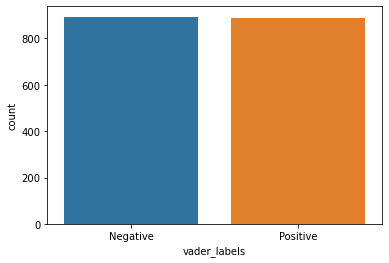

In [32]:
import seaborn as sns

sns.countplot(x='vader_labels', data=data)

Positive Sentiments


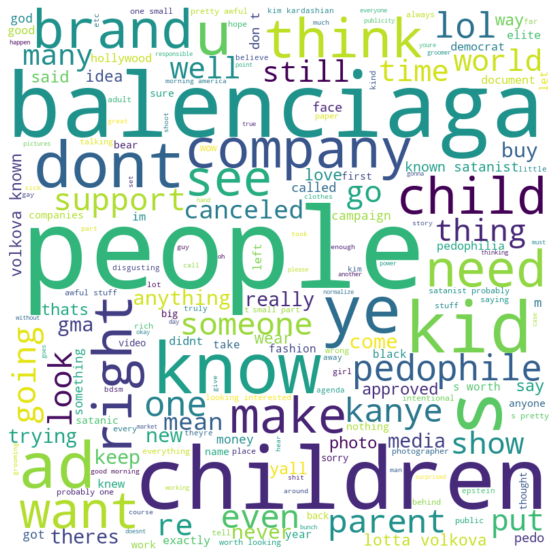

Negative Sentiments


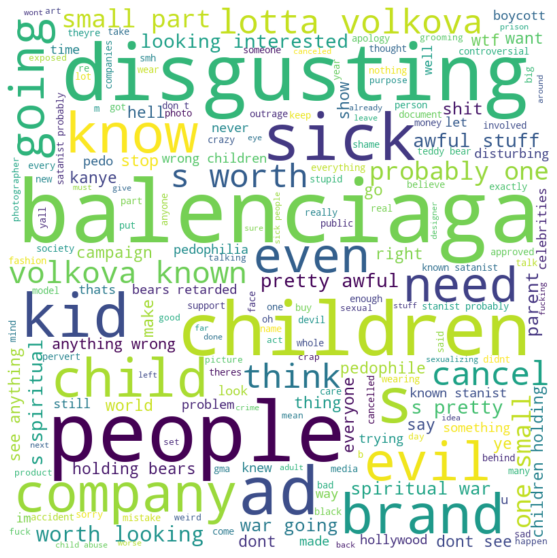

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['vader_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['vader_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [34]:
###Analysing sentiments through pretrained roBERTa

In [35]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [36]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [37]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
# List of samples
samples = data['Comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'roberta_neg' : scores[0][0].item(),  
        'roberta_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
data = pd.concat([data, scores_df], axis=1)

# Print the updated dataframe
print(data)

                                                                                                                                                                                                                                                                                                                                                                                                                 Comments  \
0                                                                                                                                                                                                                                                                                                                                                                                                                  cancel   
1                                                                                                                                                                             

In [38]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos
0,cancel,[cancel],"[(cancel, NN)]",-0.2500,0,Negative,0.472326,0.441412
1,niggas knew wht doin u making ad get people attention u tht common sense karmic retribution show us forcefully shit front us programmed helpless oh masses tht unknown matrix war,"[niggas, knew, wht, doin, u, making, ad, get, people, attention, u, tht, common, sense, karmic, retribution, show, us, forcefully, shit, front, us, programmed, helpless, oh, masses, tht, unknown, matrix, war]","[(niggas, RB), (knew, VBD), (wht, JJ), (doin, NN), (u, JJ), (making, VBG), (ad, NN), (get, NN), (people, NNS), (attention, NN), (u, JJ), (tht, JJ), (common, JJ), (sense, NN), (karmic, JJ), (retribution, NN), (show, VBP), (us, PRP), (forcefully, RB), (shit, VBD), (front, JJ), (us, PRP), (programmed, VBD), (helpless, JJ), (oh, JJ), (masses, NNS), (tht, VBP), (unknown, JJ), (matrix, NNS), (war, NN)]",-0.9169,0,Negative,0.785927,0.206012
2,balenciaga airs commercial wants play victim sue people hired putting together commercial approved that’s rich,"[balenciaga, airs, commercial, wants, play, victim, sue, people, hired, putting, together, commercial, approved, that, ’, s, rich]","[(balenciaga, NN), (airs, VBZ), (commercial, JJ), (wants, VBZ), (play, VB), (victim, JJ), (sue, NN), (people, NNS), (hired, VBD), (putting, VBG), (together, RB), (commercial, JJ), (approved, VBD), (that, IN), (’, NNP), (s, VBD), (rich, JJ)]",0.7717,1,Positive,0.349872,0.523594
3,publicity dont get,"[publicity, dont, get]","[(publicity, NN), (dont, NN), (get, NN)]",0.0000,1,Positive,0.558238,0.411410
4,why’s everyone quiet,"[why, ’, s, everyone, quiet]","[(why, WRB), (’, JJ), (s, NN), (everyone, NN), (quiet, JJ)]",0.0000,1,Positive,0.581653,0.385204
5,broadcasted india believe hardly anyone know video bcoz many know teddybear looks normal dont watch ads keenly,"[broadcasted, india, believe, hardly, anyone, know, video, bcoz, many, know, teddybear, looks, normal, dont, watch, ads, keenly]","[(broadcasted, VBN), (india, JJ), (believe, VBP), (hardly, RB), (anyone, NN), (know, JJ), (video, NN), (bcoz, VBD), (many, JJ), (know, VBP), (teddybear, JJ), (looks, NNS), (normal, JJ), (dont, JJ), (watch, NN), (ads, NNS), (keenly, RB)]",-0.1877,0,Negative,0.374128,0.563708
6,money power silent media,"[money, power, silent, media]","[(money, NN), (power, NN), (silent, JJ), (media, NNS)]",0.0000,1,Positive,0.406649,0.556043
7,islam last hope 💪,"[islam, last, hope, 💪]","[(islam, NN), (last, JJ), (hope, NN), (💪, VBD)]",0.4404,1,Positive,0.021329,0.581291
8,r u muslim,"[r, u, muslim]","[(r, NN), (u, JJ), (muslim, NN)]",0.0000,1,Positive,0.363493,0.582919
9,crossing line…lol… crossing line comes people pediphiles… term “panda” mean anything… jst got accustomed accept group though world would support to… everyone wears brand sick people know ever see someone wear brand i’m going make sure i’m extra nice indivialgroup…,"[crossing, line, …, lol, …, crossing, line, comes, people, pediphiles, …, term, “, panda, ”, mean, anything, …, jst, got, accustomed, accept, group, though, world, would, support, to, …, everyone, wears, brand, sick, people, know, ever, see, someone, wear, brand, i, ’, m, going, make, sure, i, ’, m, extra, nice, indivialgroup, …]","[(crossing, VBG), (line…lol…, JJ), (crossing, VBG), (line, NN), (comes, VBZ), (people, NNS), (pediphiles…, JJ), (term, NN), (“, NNP), (panda, NN), (”, NNP), (mean, NN), (anything…, NN), (jst, NN), (got, VBD), (accustomed, JJ), (accept, JJ), (group, NN), (though, IN), (world, NN), (would, MD), (support, VB), (to…, VB), (everyone, NN), (wears, NNS), (brand, NN), (sick, JJ), (people, NNS), (know, VBP), (ever, RB), (see, VB), (someone, NN), (wear, JJ), (brand, NN), (i, NN), (’, VBP), (m, NN), (going, VBG), (make, JJ), (sure, JJ), (i, NN), (’, VBP), (m, NN), (extra, JJ), (nice, JJ), (indivialgroup…, NN)]",0.7269,1,Positive,0.033721,0.466577


In [39]:
def get_label(score):
    if score > 0.5:
        return "Positive"
    else:
        return "Negative"

# Convert the scores to labels for each model
data["roberta_labels"] = data["roberta_pos"].apply(get_label)

In [40]:
data.head(5)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels
0,cancel,[cancel],"[(cancel, NN)]",-0.2500,0,Negative,0.472326,0.441412,Negative
1,niggas knew wht doin u making ad get people attention u tht common sense karmic retribution show us forcefully shit front us programmed helpless oh masses tht unknown matrix war,"[niggas, knew, wht, doin, u, making, ad, get, people, attention, u, tht, common, sense, karmic, retribution, show, us, forcefully, shit, front, us, programmed, helpless, oh, masses, tht, unknown, matrix, war]","[(niggas, RB), (knew, VBD), (wht, JJ), (doin, NN), (u, JJ), (making, VBG), (ad, NN), (get, NN), (people, NNS), (attention, NN), (u, JJ), (tht, JJ), (common, JJ), (sense, NN), (karmic, JJ), (retribution, NN), (show, VBP), (us, PRP), (forcefully, RB), (shit, VBD), (front, JJ), (us, PRP), (programmed, VBD), (helpless, JJ), (oh, JJ), (masses, NNS), (tht, VBP), (unknown, JJ), (matrix, NNS), (war, NN)]",-0.9169,0,Negative,0.785927,0.206012,Negative
2,balenciaga airs commercial wants play victim sue people hired putting together commercial approved that’s rich,"[balenciaga, airs, commercial, wants, play, victim, sue, people, hired, putting, together, commercial, approved, that, ’, s, rich]","[(balenciaga, NN), (airs, VBZ), (commercial, JJ), (wants, VBZ), (play, VB), (victim, JJ), (sue, NN), (people, NNS), (hired, VBD), (putting, VBG), (together, RB), (commercial, JJ), (approved, VBD), (that, IN), (’, NNP), (s, VBD), (rich, JJ)]",0.7717,1,Positive,0.349872,0.523594,Positive
3,publicity dont get,"[publicity, dont, get]","[(publicity, NN), (dont, NN), (get, NN)]",0.0000,1,Positive,0.558238,0.411410,Negative
4,why’s everyone quiet,"[why, ’, s, everyone, quiet]","[(why, WRB), (’, JJ), (s, NN), (everyone, NN), (quiet, JJ)]",0.0000,1,Positive,0.581653,0.385204,Negative


<AxesSubplot:xlabel='roberta_labels', ylabel='count'>

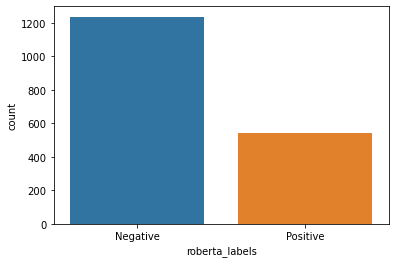

In [41]:
import seaborn as sns

sns.countplot(x='roberta_labels', data=data)

Positive Sentiments


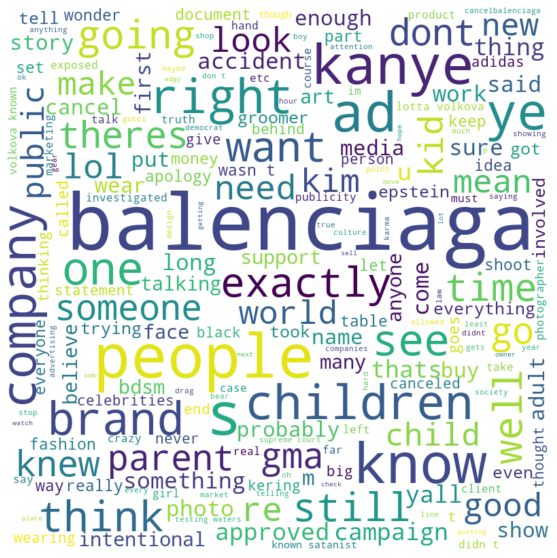

Negative Sentiments


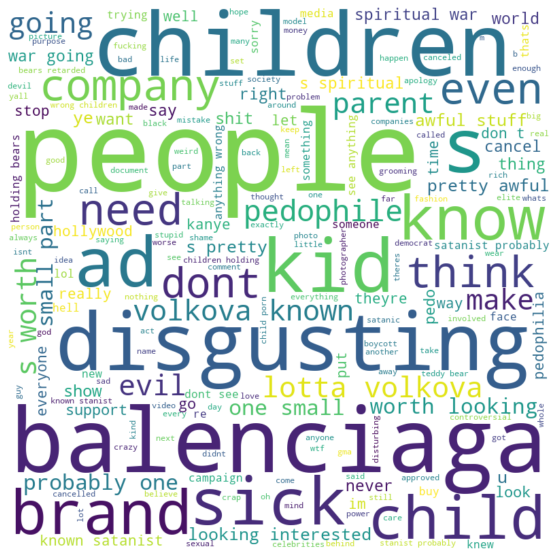

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['roberta_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['roberta_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [43]:
### Analysing sentiments through huggingface transformers

In [44]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [45]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

#Export sample comments from all the datasets
text = data['Comments'].tolist()[:100]
sentences = []
for doc in nlp.pipe(text):
    sentences.extend([sent.text for sent in doc.sents])

print(sentences)

['cancel', 'niggas knew wht doin u making ad get people attention u tht common sense karmic retribution show us forcefully shit front us programmed helpless', 'oh masses tht unknown matrix war', 'balenciaga airs commercial wants play victim sue people hired putting together commercial approved that’s rich', 'publicity dont get', 'why’s everyone quiet', 'broadcasted india believe hardly anyone know video bcoz many know teddybear looks normal dont watch ads keenly', 'money power silent media', 'islam last hope 💪', 'r u muslim', 'crossing line…lol… crossing line comes people pediphiles… term “panda” mean anything… jst got accustomed accept group though world would support to… everyone wears brand sick people know ever see someone wear brand i’m going make sure i’m extra nice indivialgroup…', 'want understand sane person would think putting', 'thats rich powerful reptilians brainwashing humans happens every aspect human exsistance funny topics pop fade away quickly sick entities running sh

In [46]:
sent_pipeline(data['Comments'].tolist()[:100])

[{'label': 'NEGATIVE', 'score': 0.999631404876709},
 {'label': 'NEGATIVE', 'score': 0.9982178807258606},
 {'label': 'POSITIVE', 'score': 0.9910929799079895},
 {'label': 'NEGATIVE', 'score': 0.7831010818481445},
 {'label': 'NEGATIVE', 'score': 0.9983878135681152},
 {'label': 'NEGATIVE', 'score': 0.9942432045936584},
 {'label': 'NEGATIVE', 'score': 0.9794473648071289},
 {'label': 'NEGATIVE', 'score': 0.5111926198005676},
 {'label': 'NEGATIVE', 'score': 0.7415170669555664},
 {'label': 'NEGATIVE', 'score': 0.9792795777320862},
 {'label': 'NEGATIVE', 'score': 0.9707323908805847},
 {'label': 'NEGATIVE', 'score': 0.9957962036132812},
 {'label': 'POSITIVE', 'score': 0.9774851202964783},
 {'label': 'NEGATIVE', 'score': 0.9778925776481628},
 {'label': 'NEGATIVE', 'score': 0.9982669353485107},
 {'label': 'NEGATIVE', 'score': 0.8552232980728149},
 {'label': 'NEGATIVE', 'score': 0.980028510093689},
 {'label': 'NEGATIVE', 'score': 0.9882036447525024},
 {'label': 'NEGATIVE', 'score': 0.80654031038284

In [47]:
sentiments = sent_pipeline(data['Comments'].tolist())
data['transformer_score'] = [s['score'] for s in sentiments]
data['transformer_labels'] = [s['label'] for s in sentiments]

In [48]:
data['transformer_labels']=data['transformer_labels'].str.title()

In [49]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels,transformer_score,transformer_labels
0,cancel,[cancel],"[(cancel, NN)]",-0.2500,0,Negative,0.472326,0.441412,Negative,0.999631,Negative
1,niggas knew wht doin u making ad get people attention u tht common sense karmic retribution show us forcefully shit front us programmed helpless oh masses tht unknown matrix war,"[niggas, knew, wht, doin, u, making, ad, get, people, attention, u, tht, common, sense, karmic, retribution, show, us, forcefully, shit, front, us, programmed, helpless, oh, masses, tht, unknown, matrix, war]","[(niggas, RB), (knew, VBD), (wht, JJ), (doin, NN), (u, JJ), (making, VBG), (ad, NN), (get, NN), (people, NNS), (attention, NN), (u, JJ), (tht, JJ), (common, JJ), (sense, NN), (karmic, JJ), (retribution, NN), (show, VBP), (us, PRP), (forcefully, RB), (shit, VBD), (front, JJ), (us, PRP), (programmed, VBD), (helpless, JJ), (oh, JJ), (masses, NNS), (tht, VBP), (unknown, JJ), (matrix, NNS), (war, NN)]",-0.9169,0,Negative,0.785927,0.206012,Negative,0.998218,Negative
2,balenciaga airs commercial wants play victim sue people hired putting together commercial approved that’s rich,"[balenciaga, airs, commercial, wants, play, victim, sue, people, hired, putting, together, commercial, approved, that, ’, s, rich]","[(balenciaga, NN), (airs, VBZ), (commercial, JJ), (wants, VBZ), (play, VB), (victim, JJ), (sue, NN), (people, NNS), (hired, VBD), (putting, VBG), (together, RB), (commercial, JJ), (approved, VBD), (that, IN), (’, NNP), (s, VBD), (rich, JJ)]",0.7717,1,Positive,0.349872,0.523594,Positive,0.991093,Positive
3,publicity dont get,"[publicity, dont, get]","[(publicity, NN), (dont, NN), (get, NN)]",0.0000,1,Positive,0.558238,0.411410,Negative,0.783101,Negative
4,why’s everyone quiet,"[why, ’, s, everyone, quiet]","[(why, WRB), (’, JJ), (s, NN), (everyone, NN), (quiet, JJ)]",0.0000,1,Positive,0.581653,0.385204,Negative,0.998388,Negative
5,broadcasted india believe hardly anyone know video bcoz many know teddybear looks normal dont watch ads keenly,"[broadcasted, india, believe, hardly, anyone, know, video, bcoz, many, know, teddybear, looks, normal, dont, watch, ads, keenly]","[(broadcasted, VBN), (india, JJ), (believe, VBP), (hardly, RB), (anyone, NN), (know, JJ), (video, NN), (bcoz, VBD), (many, JJ), (know, VBP), (teddybear, JJ), (looks, NNS), (normal, JJ), (dont, JJ), (watch, NN), (ads, NNS), (keenly, RB)]",-0.1877,0,Negative,0.374128,0.563708,Positive,0.994243,Negative
6,money power silent media,"[money, power, silent, media]","[(money, NN), (power, NN), (silent, JJ), (media, NNS)]",0.0000,1,Positive,0.406649,0.556043,Positive,0.979447,Negative
7,islam last hope 💪,"[islam, last, hope, 💪]","[(islam, NN), (last, JJ), (hope, NN), (💪, VBD)]",0.4404,1,Positive,0.021329,0.581291,Positive,0.511193,Negative
8,r u muslim,"[r, u, muslim]","[(r, NN), (u, JJ), (muslim, NN)]",0.0000,1,Positive,0.363493,0.582919,Positive,0.741517,Negative
9,crossing line…lol… crossing line comes people pediphiles… term “panda” mean anything… jst got accustomed accept group though world would support to… everyone wears brand sick people know ever see someone wear brand i’m going make sure i’m extra nice indivialgroup…,"[crossing, line, …, lol, …, crossing, line, comes, people, pediphiles, …, term, “, panda, ”, mean, anything, …, jst, got, accustomed, accept, group, though, world, would, support, to, …, everyone, wears, brand, sick, people, know, ever, see, someone, wear, brand, i, ’, m, going, make, sure, i, ’, m, extra, nice, indivialgroup, …]","[(crossing, VBG), (line…lol…, JJ), (crossing, VBG), (line, NN), (comes, VBZ), (people, NNS), (pediphiles…, JJ), (term, NN), (“, NNP), (panda, NN), (”, NNP), (mean, NN), (anything…, NN), (jst, NN), (got, VBD), (accustomed, JJ), (accept, JJ), (group, NN), (though, IN), (world, NN), (would, MD), (support, VB), (to…, VB), (everyone, NN), (wears, NNS), (brand, NN), (sick, JJ), (people, NNS), (know, VBP),

<AxesSubplot:xlabel='transformer_labels', ylabel='count'>

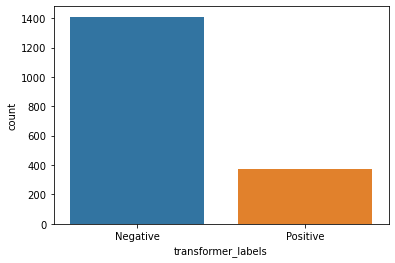

In [50]:
import seaborn as sns

sns.countplot(x='transformer_labels', data=data)

Positive Sentiments


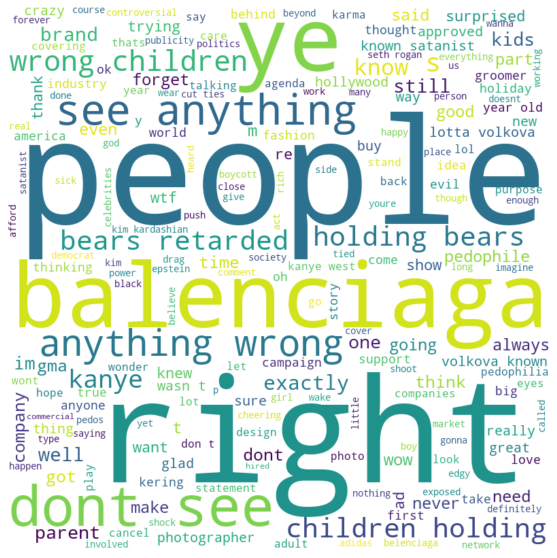

Negative Sentiments


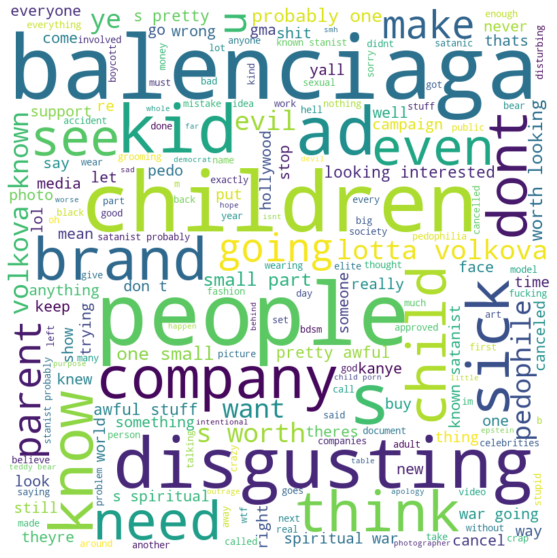

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['transformer_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['transformer_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [52]:
##### creating data frame of labels of the models used.

In [53]:
labels = data[['Comments','vader_labels','roberta_labels','transformer_labels']]

In [54]:
labels.head(10)

,Comments,vader_labels,roberta_labels,transformer_labels
0,cancel,Negative,Negative,Negative
1,niggas knew wht doin u making ad get people attention u tht common sense karmic retribution show us forcefully shit front us programmed helpless oh masses tht unknown matrix war,Negative,Negative,Negative
2,balenciaga airs commercial wants play victim sue people hired putting together commercial approved that’s rich,Positive,Positive,Positive
3,publicity dont get,Positive,Negative,Negative
4,why’s everyone quiet,Positive,Negative,Negative
5,broadcasted india believe hardly anyone know video bcoz many know teddybear looks normal dont watch ads keenly,Negative,Positive,Negative
6,money power silent media,Positive,Positive,Negative
7,islam last hope 💪,Positive,Positive,Negative
8,r u muslim,Positive,Positive,Negative
9,crossing line…lol… crossing line comes people pediphiles… term “panda” mean anything… jst got accustomed accept group though world would support to… everyone wears brand sick people know ever see someone wear brand i’m going make sure i’m extra nice indivialgroup…,Positive,Negative,Negative


In [55]:
####Checking accuracy and F1 Score of the models used.

In [56]:
from sklearn.metrics import accuracy_score, f1_score


# Get the Vader labels
y_true = data['transformer_labels']
# Get the labels from approach 1
y_pred_approach_1 = data['vader_labels']
y_pred_approach_2 = data['roberta_labels']
# Calculate the accuracy score for each approach
acc_approach_1 = accuracy_score(y_true, y_pred_approach_1)
acc_approach_2 = accuracy_score(y_true, y_pred_approach_2)
# Calculate the F1 score for each approach
f1_approach_1 = f1_score(y_true, y_pred_approach_1, average='weighted')
f1_approach_2 = f1_score(y_true, y_pred_approach_2, average='weighted')
# Print the results
 
print("Accuracy for vader_labels : {:.4f}".format(acc_approach_1))
print("F1 score for vader_labels: {:.4f}".format(f1_approach_1))
print("Accuracy for roberta_labels : {:.4f}".format(acc_approach_2))
print("F1 score for roberta_labels: {:.4f}".format(f1_approach_2))

Accuracy for vader_labels : 0.6247
F1 score for vader_labels: 0.6596
Accuracy for roberta_labels : 0.7146
F1 score for roberta_labels: 0.7322


In [57]:
####comparison of the results of the scores of models through plots

In [58]:
import matplotlib.pyplot as plt
vader_f1 = [f1_approach_1,]
roberta_f1 = [f1_approach_2]
vader_acc = [acc_approach_1]
roberta_acc = [acc_approach_2]

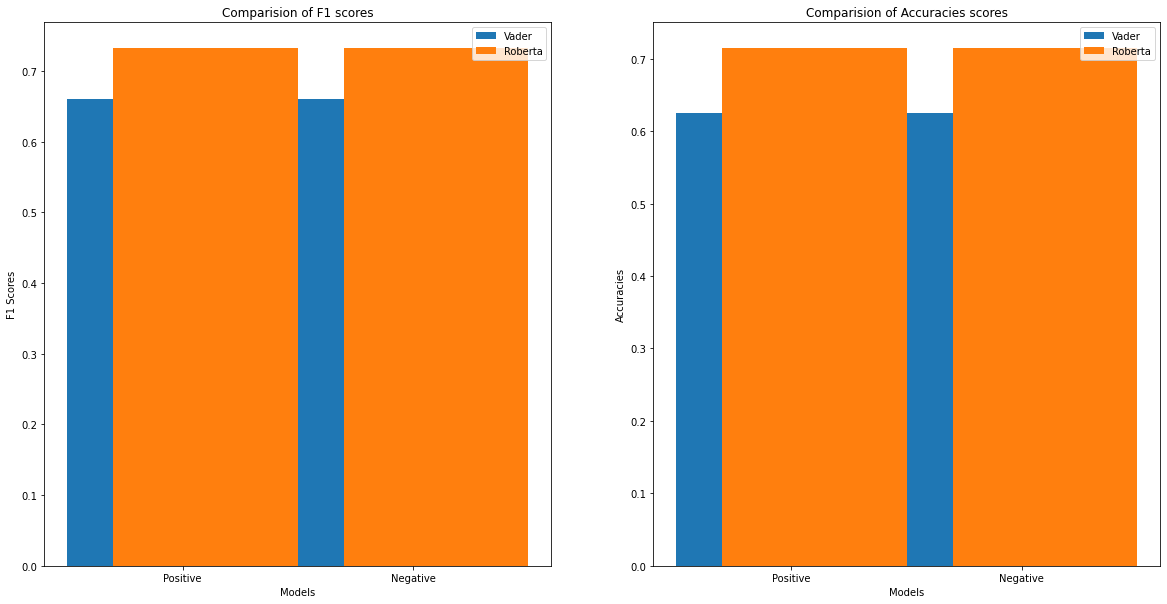

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].bar([0, 1], vader_f1, label='Vader')
axs[0].bar([0.2, 1.2], roberta_f1, label='Roberta')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('F1 Scores')
axs[0].set_xticks([0.1, 1.1])
axs[0].set_xticklabels(['Positive', 'Negative'])
axs[0].set_title('Comparision of F1 scores')
axs[0].legend()
# Plot accuracies in the second subplot
axs[1].bar([0, 1], vader_acc, label='Vader')
axs[1].bar([0.2, 1.2], roberta_acc, label='Roberta')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Accuracies')
axs[1].set_xticks([0.1, 1.1])
axs[1].set_xticklabels(['Positive', 'Negative'])
axs[1].set_title('Comparision of Accuracies scores')
axs[1].legend()

In [60]:
###Conclusion
###Based on the F1 scores, the roberta model has the highest F1 score of  0.7322 ,outperforming vader model's f1 score of  0.6596, so to conclude ,roberta model predicted sentiments much accurately than vader model for a dataset of this type and size.


